Une partie du programme provient de cette source https://elaq.github.io/weasel/

In [2]:
import random
import string
import matplotlib.pyplot as plt
import numpy as np

CONST_STR = "METHINKS IT IS LIKE A WEASEL"
CONST_SIZE = 100
CONST_PROB = 1


def genRandChar():  # print random uppercase letter or whitespace
    """Return random uppercase letter or whitespace."""
    return random.choice(string.ascii_uppercase + string.whitespace)


def genRandStr():   # print random string of length CONST_STR
    """Return random string of length CONST_STR."""
    randStr = ''
    for x in range(len(CONST_STR)):
        randStr = randStr + genRandChar()
    return randStr


def compStr(randStr):   # compare CONST_STR with randStr
    """Return index of randStr -- number of common characters in randStr and CONST_STR."""
    randStrIndex = 0
    for i in range(0, len(CONST_STR)):
        if CONST_STR[i] == randStr[i]:
            randStrIndex += 1
    return randStrIndex


def modRandStr(randStr, prob):    # modify each character of randStr with probability CONST_PROB%
    """Return modified randStr -- each character of randStr is modified with probability CONST_PROB%."""
    newRandStr = randStr
    for x in range(0, len(CONST_STR)):
        randInt = random.randint(1, 100)
        if randInt <= prob:
            newRandStr = newRandStr[:x] + genRandChar() + newRandStr[x + 1:]
    return newRandStr


def index(prob):
    loopNumber = 0
    strFound = False
    randStr = genRandStr()
    resultList = []
    while not strFound:
        strList = [''] * CONST_SIZE
        indexList = [None] * CONST_SIZE
        for x in range(0, CONST_SIZE):
            strList[x] = modRandStr(randStr, prob)
            indexList[x] = compStr(strList[x])
        maxIndex = max(indexList)
        if maxIndex == len(CONST_STR):
            strFound = True
        randStr = strList[indexList.index(maxIndex)]
        resultList.append(str(loopNumber) + ": " + randStr + " -- score: " + str(maxIndex))
        loopNumber += 1
    return loopNumber

P = np.linspace(1, 10, 25)

G = []

for i in range(0, 15):
    g = []
    for p in P:
        g.append(index(p))

    g = np.array(g)
    G.append(g)

G = np.array(G)
M = np.average(G, axis=0)

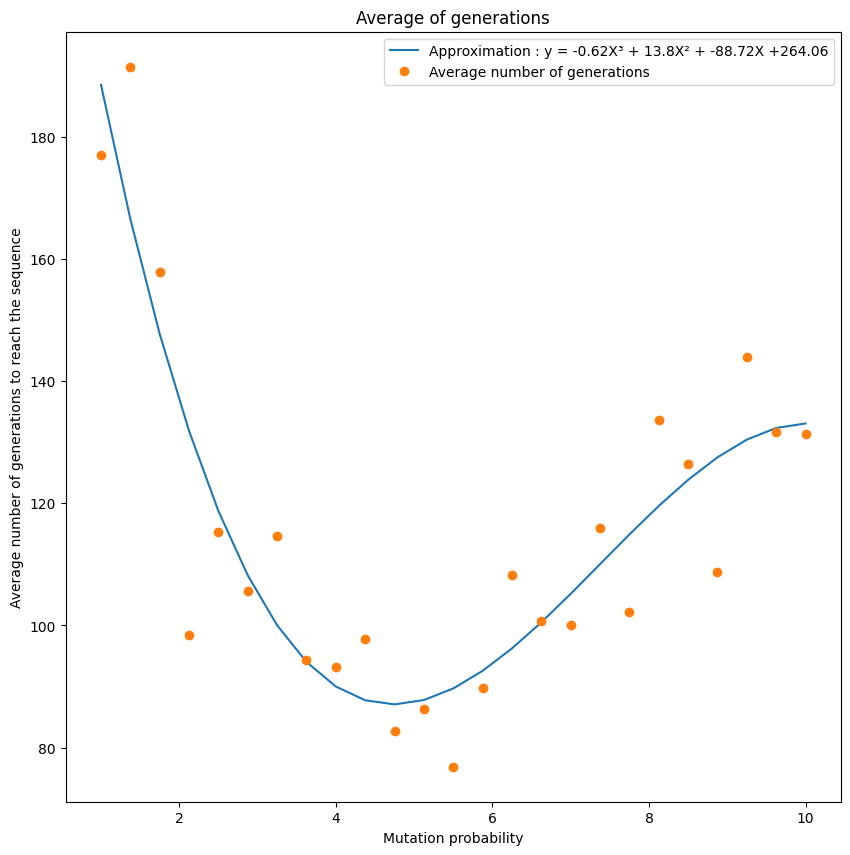

[ -0.62326463  13.79502704 -88.72337947 264.05664269]


In [3]:
M_APPRO = np.polyfit(P, M, 3)
a,b,c,d=M_APPRO
modele = np.poly1d(M_APPRO)

def fun(P):
    return round(a,2)*P*P*P + round(b,2)*P*P + round(c,2)*P + round(d,2)

fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Average of generations")
plt.plot(P, modele(P), label="Approximation : y = " + str(round(a, 2)) + "X³ + " + str(round(b, 2)) + "X² + " + str(round(c, 2)) + "X +" + str(round(d, 2)))
plt.plot(P, M, "o", label="Average number of generations")
plt.xlabel("Mutation probability")
plt.ylabel("Average number of generations to reach the sequence")
plt.legend()
plt.show()

print(M_APPRO)